# **HOME CREDIT SCORECARD MODEL**

## **Background of the Problem**

Home Credit wants to predict credit scores using statistical and machine learning methods. So, Home Credit can ensure that customers are able to make payments and are not rejected when applying for a loan, and loans can be given with a principal, maturity, and repayment calendar that will motivate customers to be successful.

## **Scope and Goals**

*   The **dataset** used is the **HCI Credit Score** which consists of 2 data, namely **application training (with Target)** and **application test (without TARGET)**.

*   The **machine learning models** used are **Logistic Regression**, **Decision Tree**, and **K-Nearest Neighbors (KNN)**.

*   **Identify** and **predict customers** who have the **potential to be able to pay off their loans**, and who are experiencing **difficulties in paying off their loans**.

## **Methodology**

# Import Packages

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

# Import Data (Application Train)

In [60]:
application_train = pd.read_csv("application_train.csv", sep = ',')
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


The application_train data consists of **307,511 rows** and **122 columns or features**.

In the `TARGET` feature, customers who experience **payment difficulties**, namely experiencing delays in payment of more than X days on at least one installment of the first Y loan in the sample, are **marked with a value of 1**. Meanwhile, **other cases are marked 0**.

# Exploratory Data Analysis (EDA)

In [61]:
# View data types
application_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

## Total Customers Based on Loan Repayment Ability

In [62]:
app_train = application_train.copy()

In [63]:
decode_map = {0: "No Payment Difficulty", 1: "Payment Difficulty"}
def decode_sentiment(label):
    return decode_map[int(label)]

app_train['TARGET'] = app_train['TARGET'].apply(lambda x: decode_sentiment(x))

In [64]:
target_group = (app_train[['TARGET']]
                .groupby("TARGET")
                .agg(COUNT = ("TARGET", "count"))
                .sort_values(by = ["COUNT"], ascending = False)
                .reset_index()
                )
print(target_group)

                  TARGET   COUNT
0  No Payment Difficulty  282686
1     Payment Difficulty   24825


In [65]:
dis_group = app_train['TARGET'].value_counts(normalize = True)
print(dis_group)

No Payment Difficulty    0.919271
Payment Difficulty       0.080729
Name: TARGET, dtype: float64


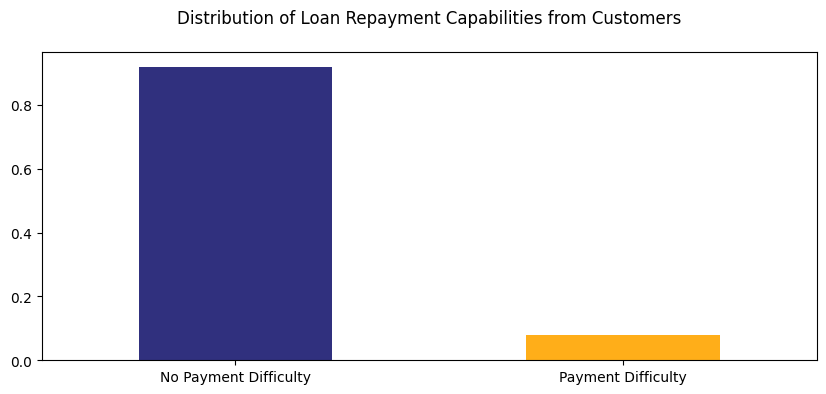

In [66]:
fig = plt.figure(figsize = (10, 4))
dis_group.plot(kind='bar', color= ['midnightblue', 'orange'], alpha = 0.9, rot = 0)
plt.title('Distribution of Loan Repayment Capabilities from Customers\n', fontsize = 12)
plt.show()

There are **282,686 customers or around 92%**, which shows that customers do **not experience difficulties** in making loan payments within a certain period. Then, there were **24,825 customers or around 8%** who indicated there were **problems in making loan payments**.

## Customer Loan Repayment Ability Based on Contract Type

In [67]:
contract_type = app_train.groupby(by = ['NAME_CONTRACT_TYPE','TARGET'], as_index = False)['SK_ID_CURR'].count()
contract_type.rename(columns = {'SK_ID_CURR' : 'TOTAL_CUSTOMERS'}, inplace = True)
contract_type.sort_values(by = 'NAME_CONTRACT_TYPE', ascending = True)

,NAME_CONTRACT_TYPE,TARGET,TOTAL_CUSTOMERS
0,Cash loans,No Payment Difficulty,255011
1,Cash loans,Payment Difficulty,23221
2,Revolving loans,No Payment Difficulty,27675
3,Revolving loans,Payment Difficulty,1604


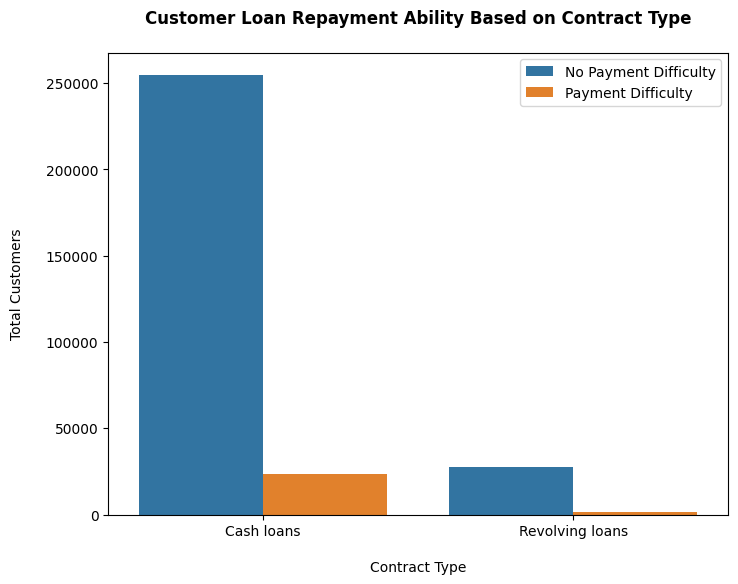

In [68]:
plt.figure(figsize = (8, 6))
sns.barplot(x = 'NAME_CONTRACT_TYPE', y = 'TOTAL_CUSTOMERS', hue = 'TARGET', data = contract_type)

plt.xlabel('\nContract Type')
plt.ylabel('Total Customers\n')
plt.title('Customer Loan Repayment Ability Based on Contract Type\n', fontweight = 'bold', fontsize = 12)
plt.legend()
plt.show()

There are far **more customers taking cash loans than revolving loans**.

## Customer Loan Repayment Ability Based on Family Status

In [69]:
family_status = app_train.groupby(by = ['NAME_FAMILY_STATUS','TARGET'], as_index = False)['SK_ID_CURR'].count()
family_status.rename(columns = {'SK_ID_CURR' : 'TOTAL_CUSTOMERS'}, inplace = True)
family_status.sort_values(by = 'NAME_FAMILY_STATUS', ascending = True)

,NAME_FAMILY_STATUS,TARGET,TOTAL_CUSTOMERS
0,Civil marriage,No Payment Difficulty,26814
1,Civil marriage,Payment Difficulty,2961
2,Married,No Payment Difficulty,181582
3,Married,Payment Difficulty,14850
4,Separated,No Payment Difficulty,18150
5,Separated,Payment Difficulty,1620
6,Single / not married,No Payment Difficulty,40987
7,Single / not married,Payment Difficulty,4457
8,Unknown,No Payment Difficulty,2
9,Widow,No Payment Difficulty,15151


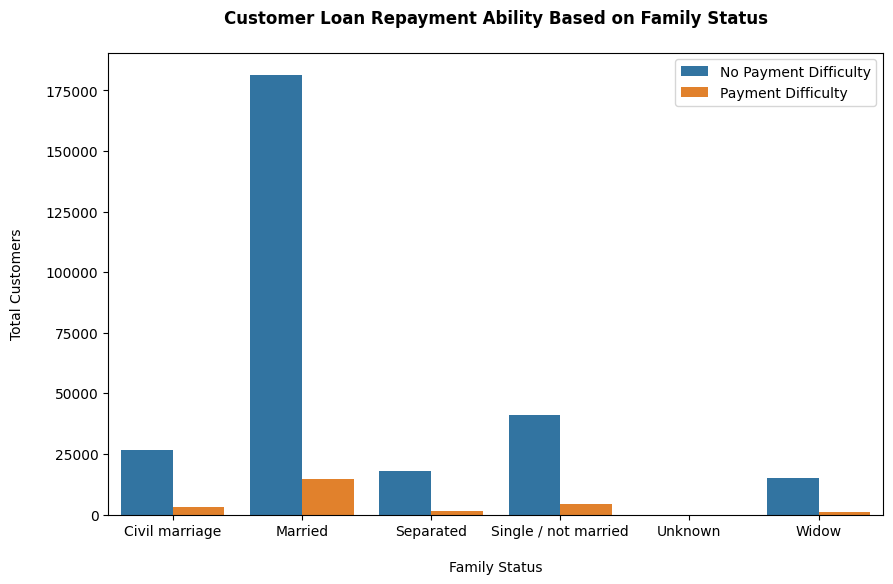

In [70]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'NAME_FAMILY_STATUS', y = 'TOTAL_CUSTOMERS', hue = 'TARGET', data = family_status)

plt.xlabel('\nFamily Status')
plt.ylabel('Total Customers\n')
plt.title('Customer Loan Repayment Ability Based on Family Status\n', fontweight = 'bold', fontsize = 12)
plt.legend()
plt.show()

*   It is known that **married customers applied for the most loans**, namely **around 196,432 loan applications**.
*   Customers with **civil marriage** and **single status** have the highest level of **difficulty in repaying loans** with a percentage of **around 10%**.

## Customer Loan Repayment Ability Based on Occupation Type

In [71]:
occupation_type = app_train.groupby(by=['OCCUPATION_TYPE','TARGET'], as_index = False)['SK_ID_CURR'].count()
occupation_type.rename(columns = {'SK_ID_CURR' : 'TOTAL_CUSTOMERS'}, inplace = True)
occupation_type.sort_values(by = 'OCCUPATION_TYPE', ascending = True)

,OCCUPATION_TYPE,TARGET,TOTAL_CUSTOMERS
0,Accountants,No Payment Difficulty,9339
1,Accountants,Payment Difficulty,474
2,Cleaning staff,No Payment Difficulty,4206
3,Cleaning staff,Payment Difficulty,447
4,Cooking staff,No Payment Difficulty,5325
5,Cooking staff,Payment Difficulty,621
6,Core staff,No Payment Difficulty,25832
7,Core staff,Payment Difficulty,1738
8,Drivers,No Payment Difficulty,16496
9,Drivers,Payment Difficulty,2107


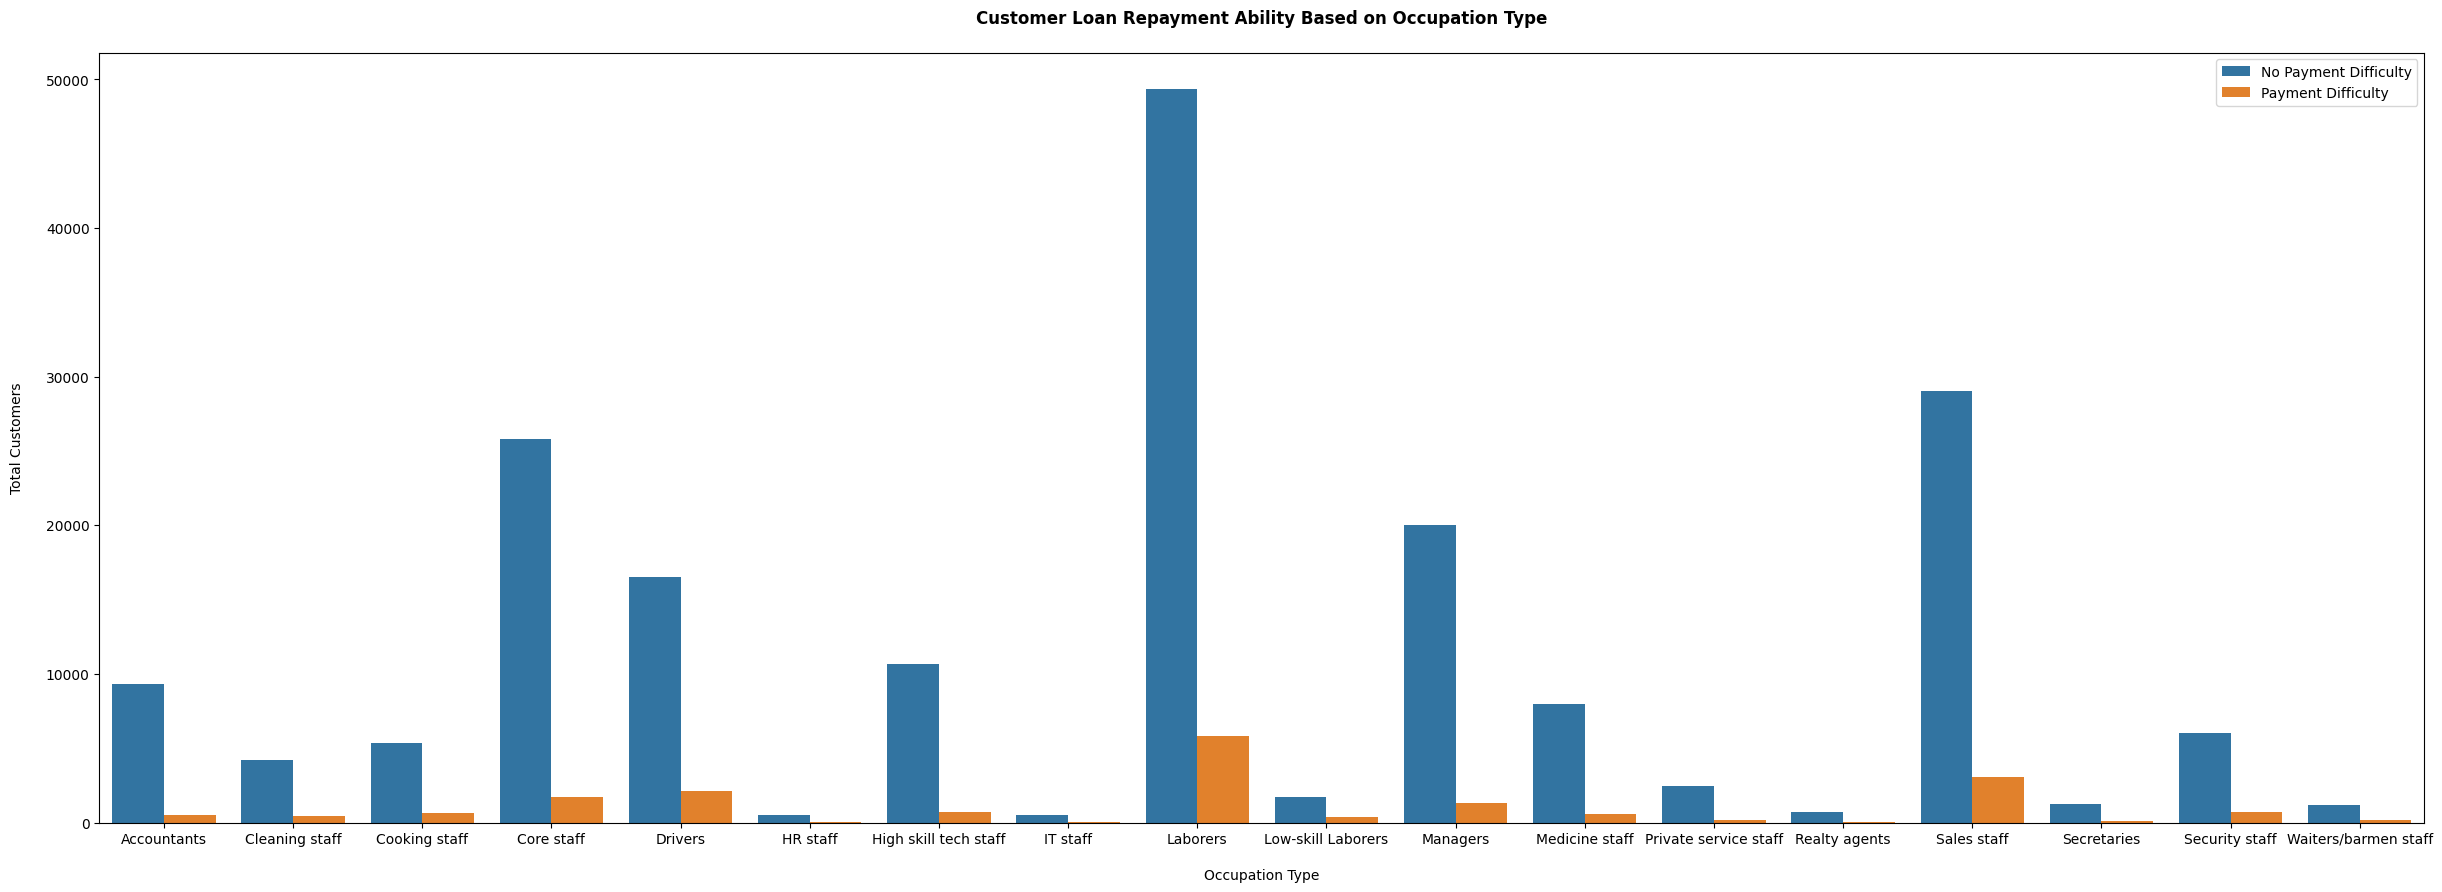

In [72]:
plt.figure(figsize = (30, 10))
sns.barplot(x = 'OCCUPATION_TYPE', y = 'TOTAL_CUSTOMERS', hue = 'TARGET', data = occupation_type)

plt.xlabel('\nOccupation Type')
plt.ylabel('Total Customers\n')
plt.title('Customer Loan Repayment Ability Based on Occupation Type\n', fontweight = 'bold', fontsize = 12)
plt.legend()
plt.show()

It is known that customers who work as **laborers applied for the most loans**, namely **around 55,186 loan applications**.

## Customer Loan Repayment Ability Based on Type of Income

In [73]:
income_type = app_train.groupby(by=['NAME_INCOME_TYPE','TARGET'], as_index = False)['SK_ID_CURR'].count()
income_type.rename(columns = {'SK_ID_CURR' : 'TOTAL_CUSTOMERS'}, inplace = True)
income_type.sort_values(by = 'NAME_INCOME_TYPE', ascending = True)

,NAME_INCOME_TYPE,TARGET,TOTAL_CUSTOMERS
0,Businessman,No Payment Difficulty,10
1,Commercial associate,No Payment Difficulty,66257
2,Commercial associate,Payment Difficulty,5360
3,Maternity leave,No Payment Difficulty,3
4,Maternity leave,Payment Difficulty,2
5,Pensioner,No Payment Difficulty,52380
6,Pensioner,Payment Difficulty,2982
7,State servant,No Payment Difficulty,20454
8,State servant,Payment Difficulty,1249
9,Student,No Payment Difficulty,18


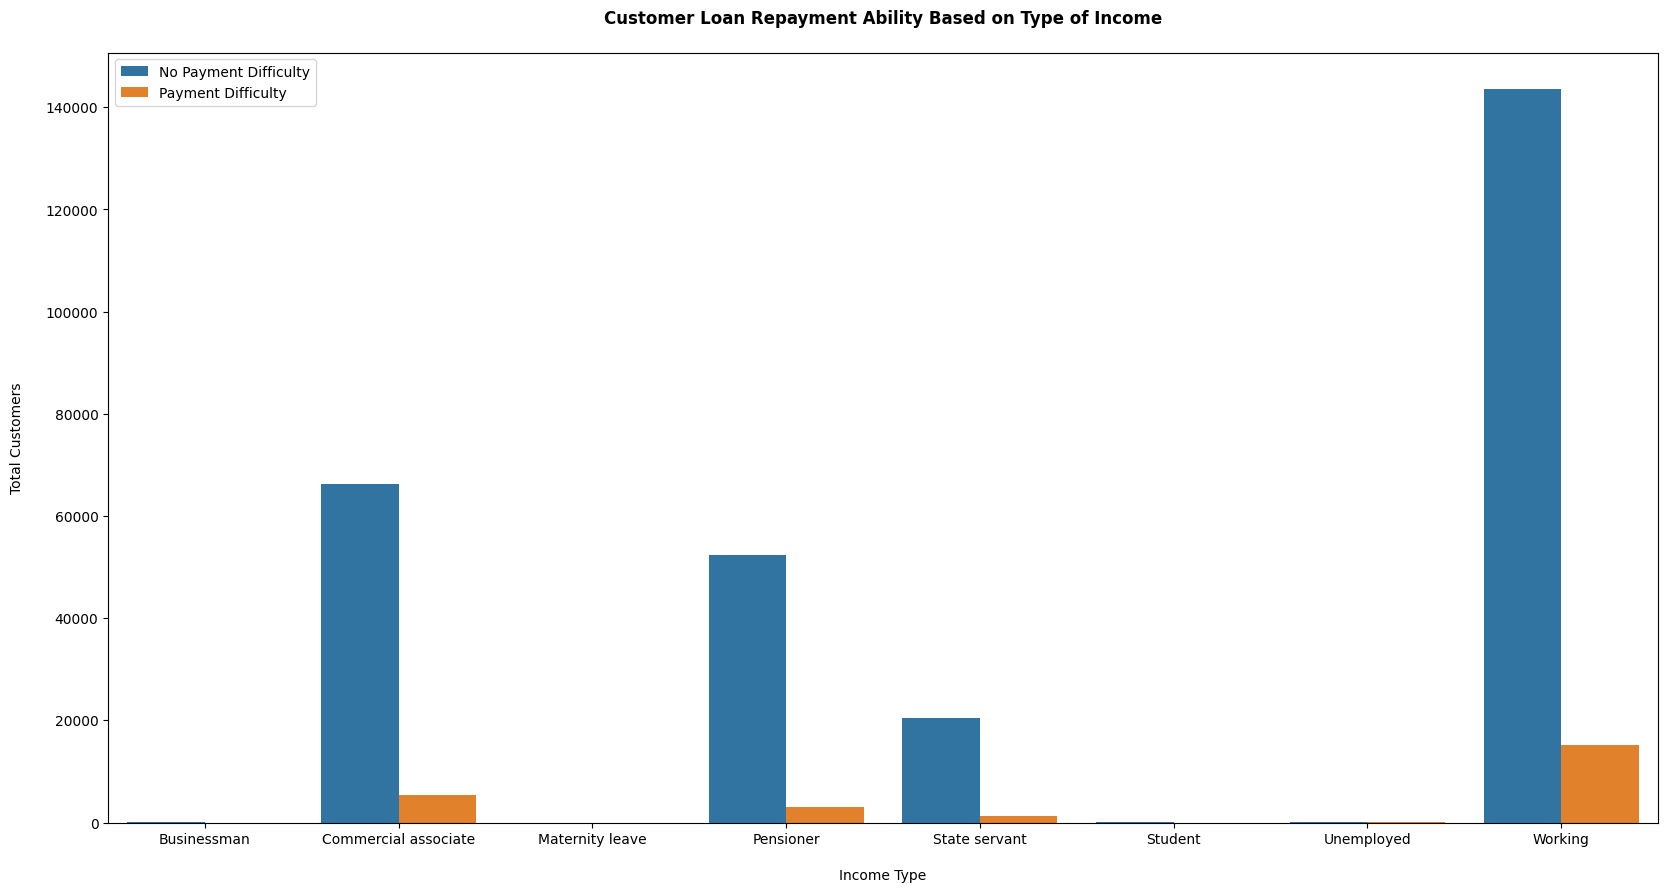

In [74]:
plt.figure(figsize = (20, 10))
sns.barplot(x = 'NAME_INCOME_TYPE', y = 'TOTAL_CUSTOMERS', hue = 'TARGET', data = income_type)

plt.xlabel('\nIncome Type')
plt.ylabel('Total Customers\n')
plt.title('Customer Loan Repayment Ability Based on Type of Income\n', fontweight = 'bold', fontsize = 12)
plt.legend()
plt.show()

*   Customers with **businessman** and **student** income types **do not experience difficulties** in paying off their loans.
*   It is known that customers with the **working income type applied for the most loans**, namely **around 158,774 loan applications**.

## Customer Loan Repayment Ability Based on Realty Ownership

In [75]:
app_train['FLAG_OWN_REALTY'] = app_train['FLAG_OWN_REALTY'].replace(['Y','N'],['Yes','No'])
own_realty = app_train.groupby(by = ['FLAG_OWN_REALTY','TARGET'], as_index = False)['SK_ID_CURR'].count()
own_realty.rename(columns = {'SK_ID_CURR' : 'TOTAL_CUSTOMERS'}, inplace = True)
own_realty.sort_values(by = 'FLAG_OWN_REALTY', ascending = True)

,FLAG_OWN_REALTY,TARGET,TOTAL_CUSTOMERS
0,No,No Payment Difficulty,86357
1,No,Payment Difficulty,7842
2,Yes,No Payment Difficulty,196329
3,Yes,Payment Difficulty,16983


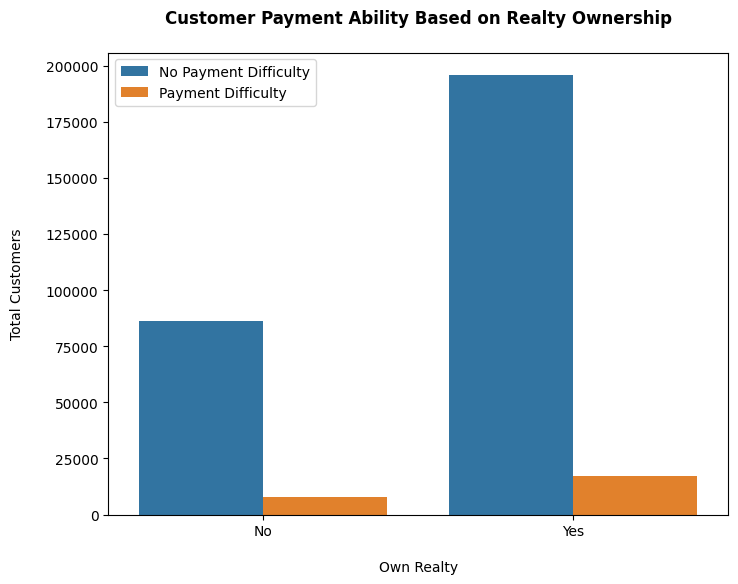

In [76]:
plt.figure(figsize = (8, 6))
sns.barplot(x = 'FLAG_OWN_REALTY', y = 'TOTAL_CUSTOMERS', hue = 'TARGET', data = own_realty)

plt.xlabel('\nOwn Realty')
plt.ylabel('Total Customers\n')
plt.title('Customer Payment Ability Based on Realty Ownership\n', fontweight = 'bold', fontsize = 12)
plt.legend()
plt.show()

Customers who own property apply for the most loans.

Customers who own real estate experience problems in repaying loans, namely around 8.32%, and customers who do not own real estate around 7.96%.

## Customer Loan Repayment Ability Based on Car Ownership

In [77]:
app_train['FLAG_OWN_CAR'] = app_train['FLAG_OWN_CAR'].replace(['Y','N'],['Yes','No'])
own_car = app_train.groupby(by = ['FLAG_OWN_CAR','TARGET'], as_index = False)['SK_ID_CURR'].count()
own_car.rename(columns = {'SK_ID_CURR' : 'TOTAL_CUSTOMERS'}, inplace = True)
own_car.sort_values(by = 'FLAG_OWN_CAR', ascending = True)

,FLAG_OWN_CAR,TARGET,TOTAL_CUSTOMERS
0,No,No Payment Difficulty,185675
1,No,Payment Difficulty,17249
2,Yes,No Payment Difficulty,97011
3,Yes,Payment Difficulty,7576


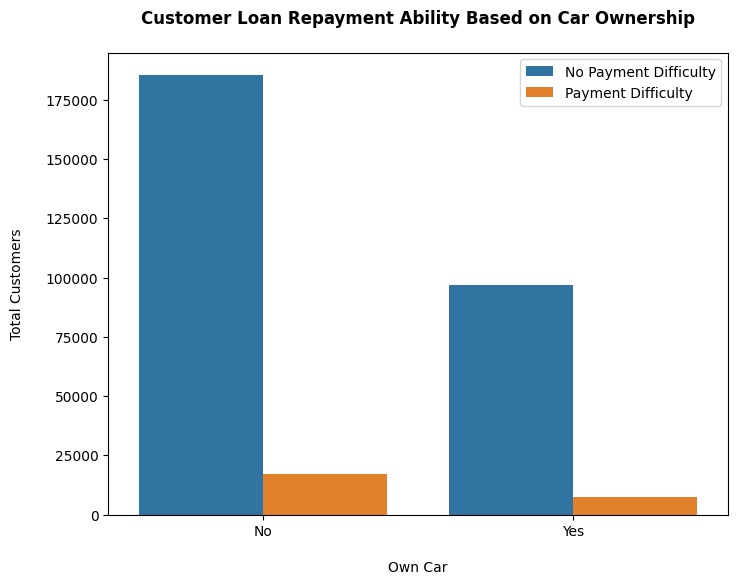

In [78]:
plt.figure(figsize = (8, 6))
sns.barplot(x = 'FLAG_OWN_CAR', y = 'TOTAL_CUSTOMERS', hue = 'TARGET', data = own_car)

plt.xlabel('\nOwn Car')
plt.ylabel('Total Customers\n')
plt.title('Customer Loan Repayment Ability Based on Car Ownership\n', fontweight = 'bold', fontsize = 12)
plt.legend()
plt.show()

Customers who do not own a car apply for loans the most.

Customers who own cars experience problems in repaying loans, namely around 7.38%, and **customers who do not own cars around 8.5%.

## Customer Loan Repayment Ability Based on Age

In [79]:
npd_age = application_train[application_train['TARGET'] == 0]['DAYS_BIRTH'].values/-365
ypd_age = application_train[application_train['TARGET'] == 1]['DAYS_BIRTH'].values/-365

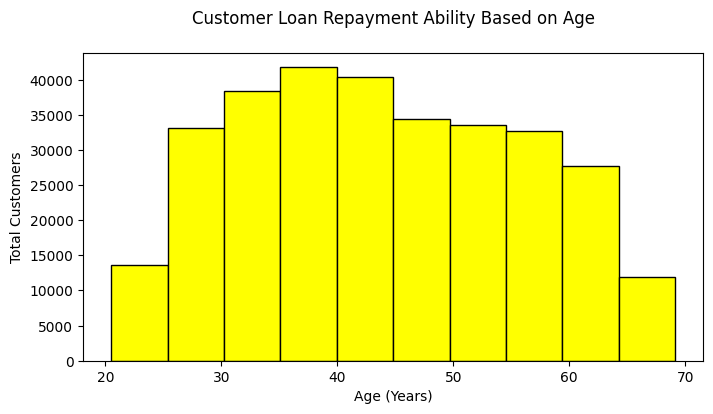

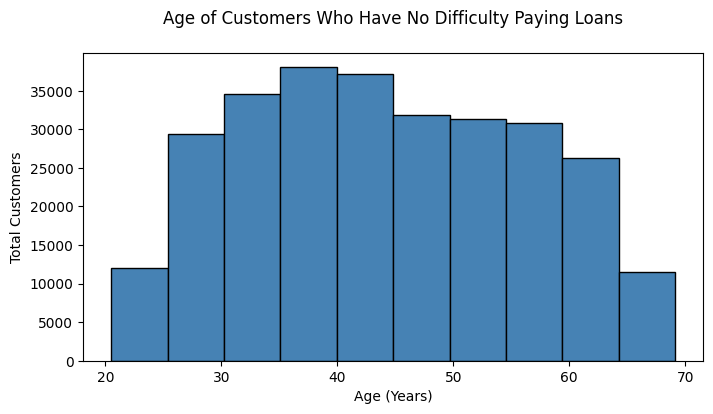

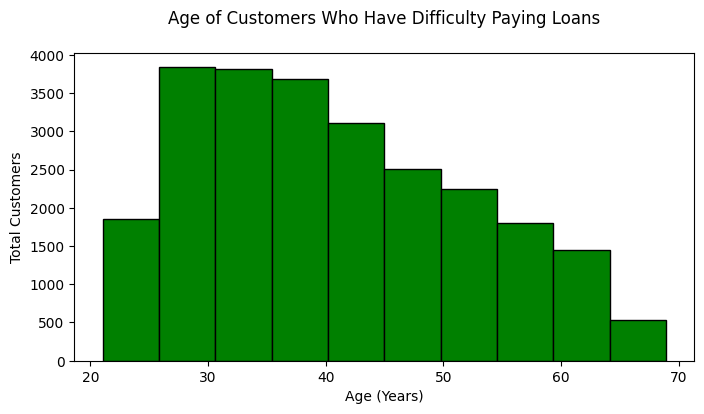

In [80]:
plt.figure(figsize = (8, 4))
plt.hist(application_train['DAYS_BIRTH'].values/-365, bins=10, edgecolor = 'black', color = 'yellow')
plt.title('Customer Loan Repayment Ability Based on Age\n')
plt.xlabel('Age (Years)')
plt.ylabel('Total Customers')
plt.show()

plt.figure(figsize = (8, 4))
plt.hist(npd_age, bins = 10, edgecolor = 'black', color = 'steelblue')
plt.title('Age of Customers Who Have No Difficulty Paying Loans\n')
plt.xlabel('Age (Years)')
plt.ylabel('Total Customers')
plt.show()

plt.figure(figsize = (8, 4))
plt.hist(ypd_age, bins = 10, edgecolor = 'black', color = 'green')
plt.title('Age of Customers Who Have Difficulty Paying Loans\n')
plt.xlabel('Age (Years)')
plt.ylabel('Total Customers')
plt.show()

*   The customers who **most often apply for loans** are in the **35-40 years** age range, followed by customers in the 40-45 year age range. Meanwhile, customers aged **<25 years and >65 years** are the groups **least likely to apply for a loan**.
*   Customers aged **35-45 years** do **not experience difficulty paying loans**. Meanwhile, customers aged **25-35 years experience difficulty in paying loans**.

# Data Preparation

## Checking for Duplicate Data

In [81]:
app_train.duplicated().sum()

0

## Checking for Missing Values

In [82]:
app_train.isnull().values.any()
mv = pd.DataFrame(app_train.isnull().sum(), columns = ['Total Missing Values'])
mv['Percentage'] = (mv['Total Missing Values']/app_train.shape[0])*100
mv.sort_values(by = ['Percentage'], ascending = False).reset_index()

,index,Total Missing Values,Percentage
0,COMMONAREA_MEDI,214865,69.872297
1,COMMONAREA_AVG,214865,69.872297
2,COMMONAREA_MODE,214865,69.872297
3,NONLIVINGAPARTMENTS_MODE,213514,69.432963
4,NONLIVINGAPARTMENTS_AVG,213514,69.432963
...,...,...,...
117,NAME_HOUSING_TYPE,0,0.000000
118,NAME_FAMILY_STATUS,0,0.000000
119,NAME_EDUCATION_TYPE,0,0.000000
120,NAME_INCOME_TYPE,0,0.000000


In [83]:
# remove features that have missing values of ±50%
app_train.drop(app_train.iloc[:, 44:91], inplace = True, axis = 1)
app_train.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace = True, axis = 1)

In [84]:
app_train.isnull().values.any()
mv = pd.DataFrame(app_train.isnull().sum().sort_values(), columns = ['Total Missing Values'])
mv['Percentage'] = (mv['Total Missing Values']/app_train.shape[0])*100
mv.sort_values(by = ['Percentage'], ascending = False).reset_index()

,index,Total Missing Values,Percentage
0,OCCUPATION_TYPE,96391,31.345545
1,EXT_SOURCE_3,60965,19.825307
2,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
3,AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
4,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
...,...,...,...
68,FLAG_DOCUMENT_18,0,0.000000
69,FLAG_DOCUMENT_17,0,0.000000
70,FLAG_DOCUMENT_16,0,0.000000
71,FLAG_DOCUMENT_15,0,0.000000


In [85]:
# Filling missing values with median for integer and float features
# Filling missing values with mode for categorical features

integer_columns = app_train.select_dtypes(include = ['int64','float64']).columns.tolist()
category_columns = app_train.select_dtypes(include = ['object']).columns.tolist()

for column in app_train:
    if app_train[column].isnull().any():
        if(column in category_columns):
            app_train[column] = app_train[column].fillna(app_train[column].mode()[0])
        else:
            app_train[column] = app_train[column].fillna(app_train[column].median())

In [86]:
app_train.isnull().values.any()
mv = pd.DataFrame(app_train.isnull().sum().sort_values(), columns = ['Total Missing Values'])
mv['Percentage'] = (mv['Total Missing Values']/app_train.shape[0])*100
mv.sort_values(by = ['Percentage'], ascending = False).reset_index()

,index,Total Missing Values,Percentage
0,SK_ID_CURR,0,0.0
1,REG_REGION_NOT_WORK_REGION,0,0.0
2,REGION_POPULATION_RELATIVE,0,0.0
3,AMT_INCOME_TOTAL,0,0.0
4,TARGET,0,0.0
...,...,...,...
68,FLAG_DOCUMENT_20,0,0.0
69,FLAG_DOCUMENT_21,0,0.0
70,AMT_REQ_CREDIT_BUREAU_HOUR,0,0.0
71,AMT_REQ_CREDIT_BUREAU_DAY,0,0.0


## Checking for Outliers

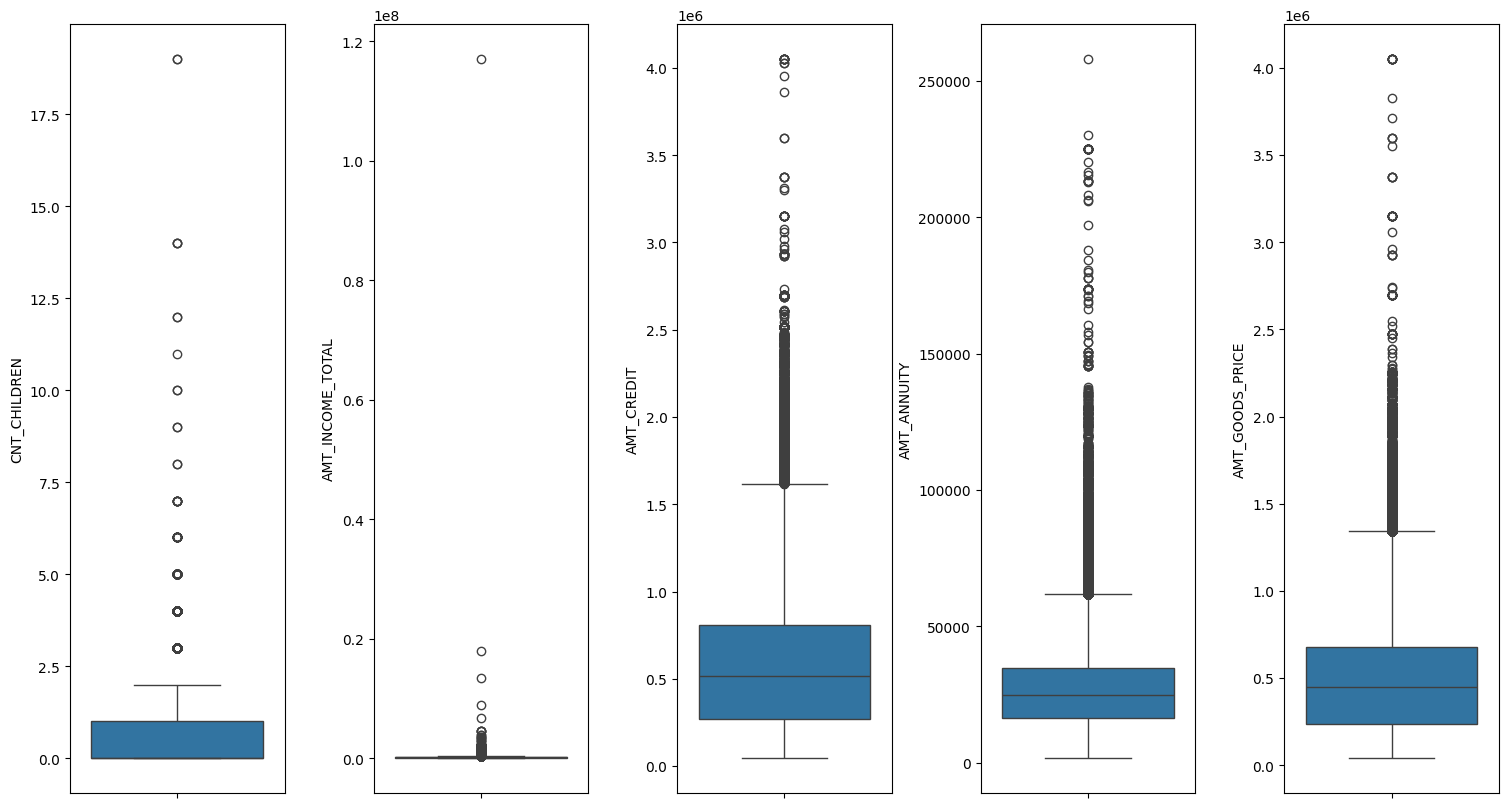

In [87]:
# data numerical features - 1
num_features = app_train[["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]]

fig, axs = plt.subplots(ncols = 5, nrows = 1, figsize = (15, 8))
index = 0
axs = axs.flatten()
for k,v in num_features.items():
    sns.boxplot(y = k, data = num_features, ax = axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

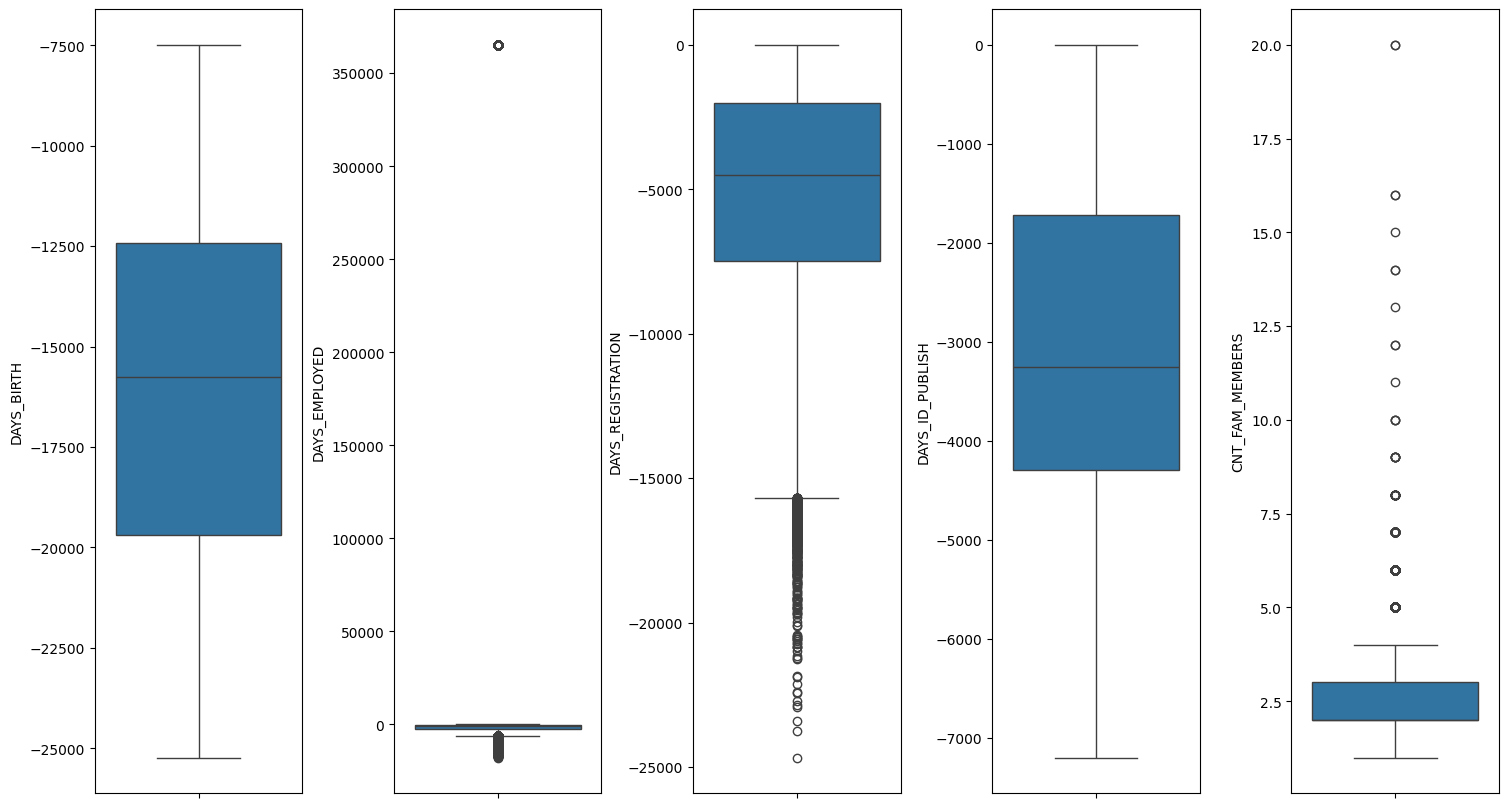

In [88]:
# data numerical features - 2
num_features = app_train[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "CNT_FAM_MEMBERS"]]

fig, axs = plt.subplots(ncols = 5, nrows = 1, figsize = (15, 8))
index = 0
axs = axs.flatten()
for k,v in num_features.items():
    sns.boxplot(y = k, data = num_features, ax = axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

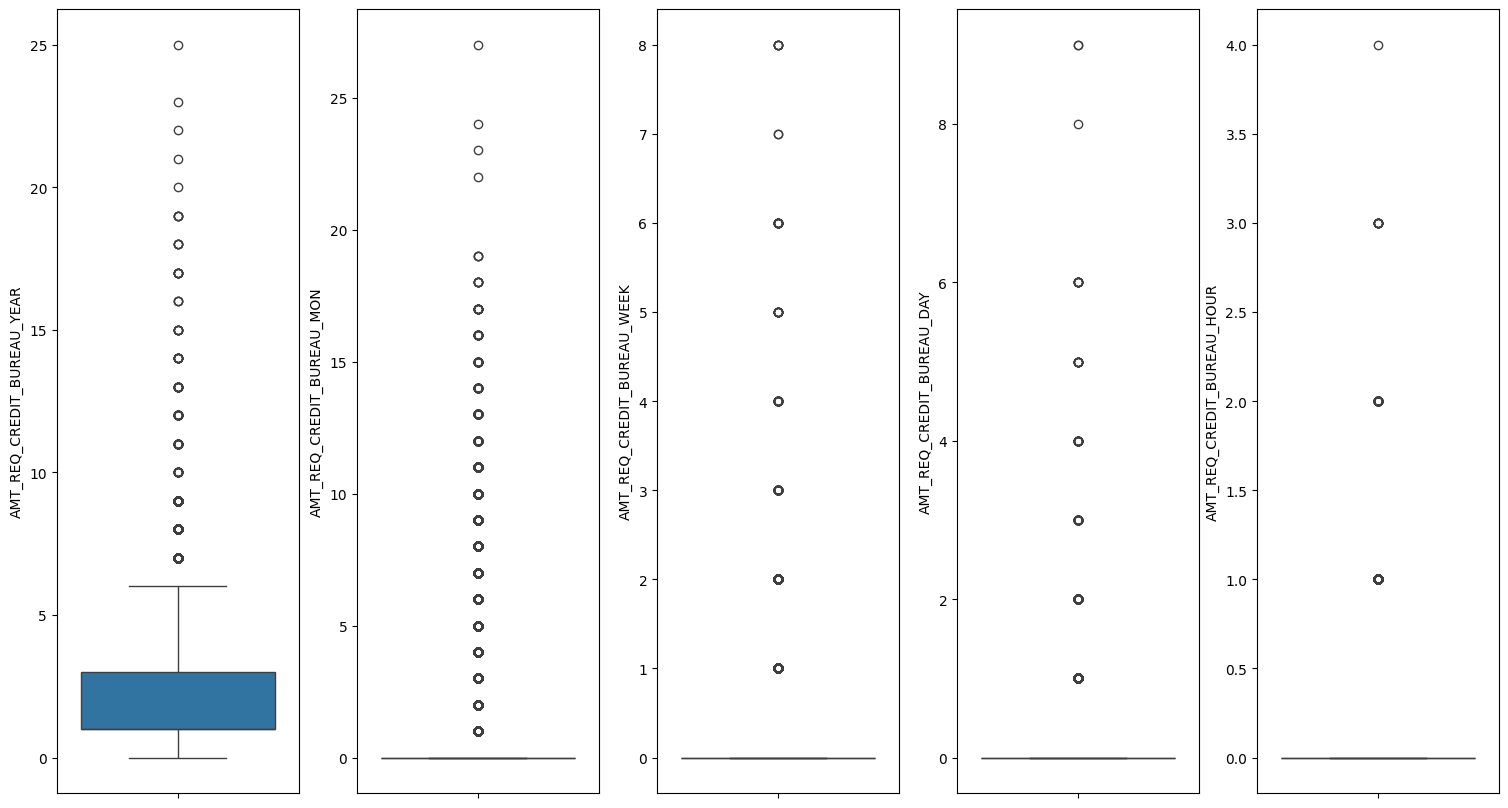

In [89]:
# data numerical features - 3
num_features = app_train[["AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR"]]

fig, axs = plt.subplots(ncols = 5, nrows = 1, figsize = (15, 8))
index = 0
axs = axs.flatten()
for k,v in num_features.items():
    sns.boxplot(y = k, data = num_features, ax = axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

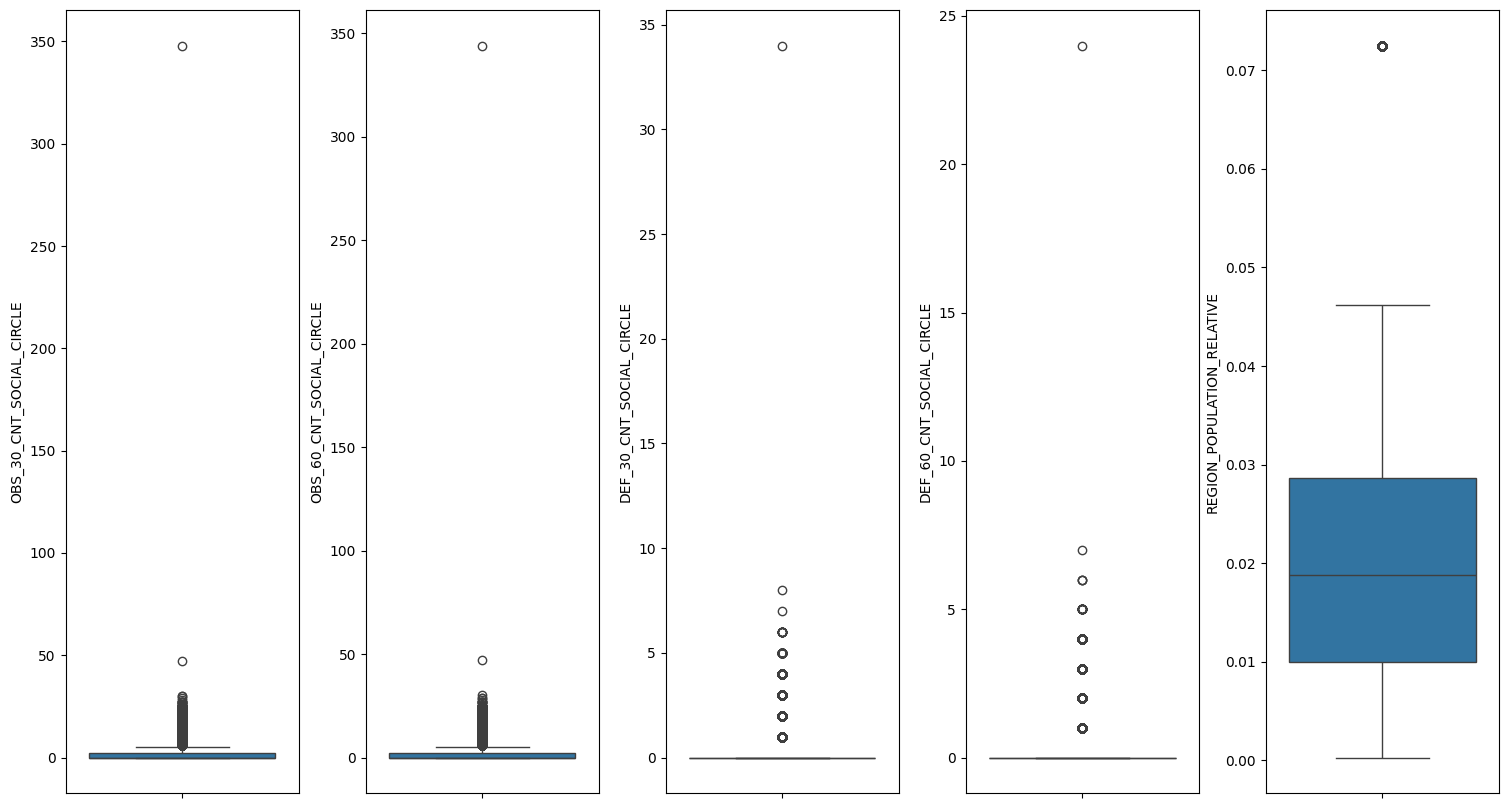

In [90]:
# data numerical features - 4
num_features = app_train[["OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "REGION_POPULATION_RELATIVE"]]

fig, axs = plt.subplots(ncols = 5, nrows = 1, figsize = (15, 8))
index = 0
axs = axs.flatten()
for k,v in num_features.items():
    sns.boxplot(y = k, data = num_features, ax = axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

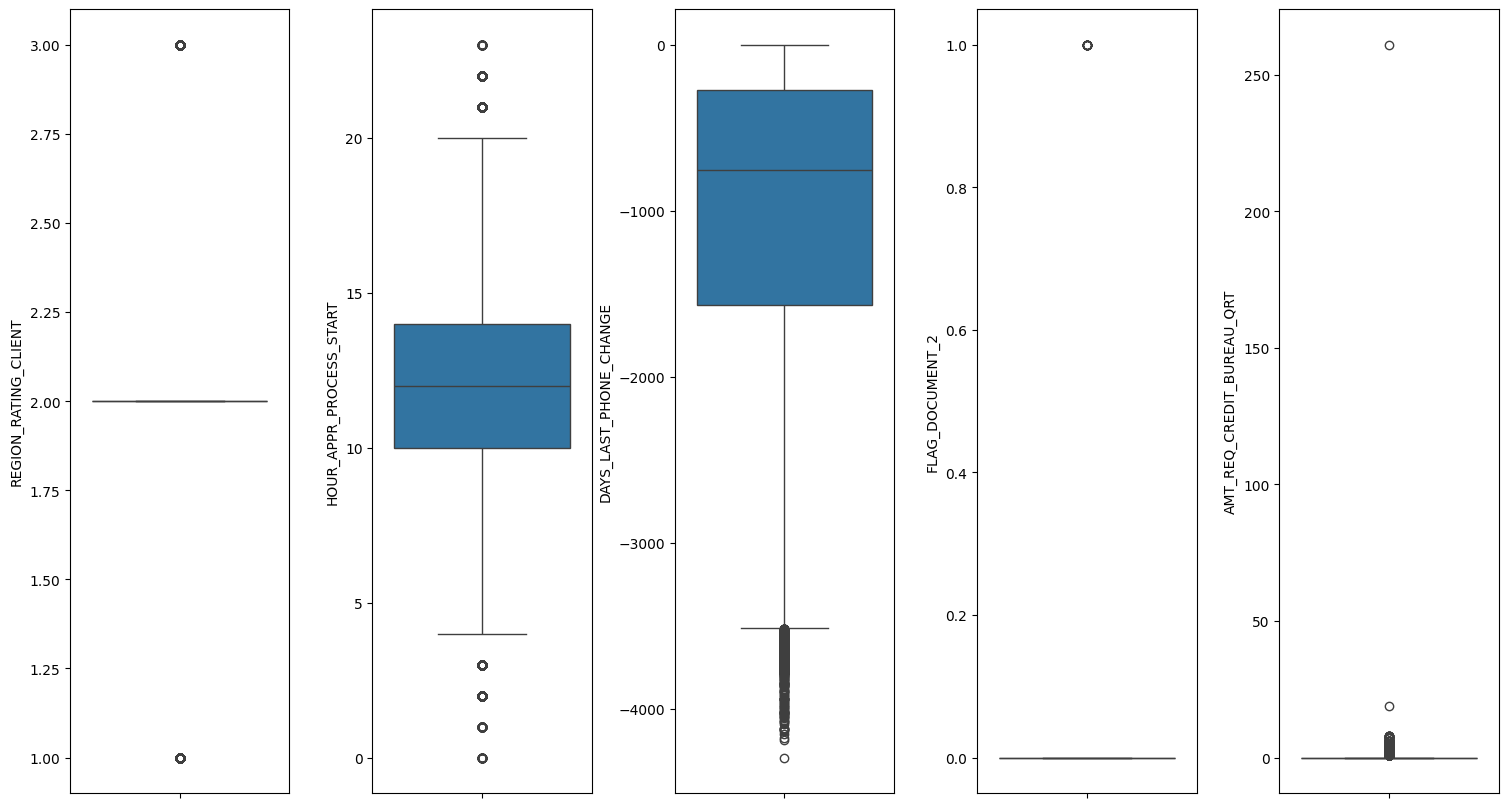

In [91]:
# data numerical features - 5
num_features = app_train[["REGION_RATING_CLIENT", "HOUR_APPR_PROCESS_START", "DAYS_LAST_PHONE_CHANGE", "FLAG_DOCUMENT_2", "AMT_REQ_CREDIT_BUREAU_QRT"]]

fig, axs = plt.subplots(ncols = 5, nrows = 1, figsize = (15, 8))
index = 0
axs = axs.flatten()
for k,v in num_features.items():
    sns.boxplot(y = k, data = num_features, ax = axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

Outliers in the numerical feature data above are not removed because we consider that there are insights that can be drawn from these outliers.

# Modeling

## Encoding Label

In [92]:
app_train[["TARGET", "CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
           "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE",
           "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = app_train[["TARGET", "CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_TYPE_SUITE",
                                                                            "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE",
                                                                            "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Selection

In [93]:
app_train.drop(['SK_ID_CURR'], inplace=True, axis = 1)

In [94]:
app_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
# change negative values to positive values
app_train.iloc[:,16:20] = app_train.iloc[:,16:20].abs()
app_train.iloc[:,45] = app_train.iloc[:,45].abs()

In [96]:
x = app_train.drop(['TARGET'], axis = 1)
y = app_train['TARGET']

In [97]:
# selecting the best features
bestfeatures = SelectKBest(score_func = chi2, k = 10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Features', 'Score']
featureScores.sort_values(by = ['Score'], ascending = False)

,Features,Score
16,DAYS_EMPLOYED,1.954124e+08
8,AMT_GOODS_PRICE,1.223080e+08
6,AMT_CREDIT,7.669987e+07
15,DAYS_BIRTH,2.235391e+06
5,AMT_INCOME_TOTAL,1.624102e+06
...,...,...
48,FLAG_DOCUMENT_5,3.020010e-02
63,FLAG_DOCUMENT_20,1.425955e-02
65,AMT_REQ_CREDIT_BUREAU_HOUR,1.832008e-03
22,FLAG_CONT_MOBILE,7.863447e-05


## Balancing Data

In [98]:
# create two different data of majority and minority class
data_majority = app_train[(app_train['TARGET']==0)]
data_minority = app_train[(app_train['TARGET']==1)]

data_minority_upsampled = resample(data_minority,
                                 replace = True,
                                 n_samples = 282686,
                                 random_state = 42)

data_upsampled = pd.concat([data_minority_upsampled, data_majority])

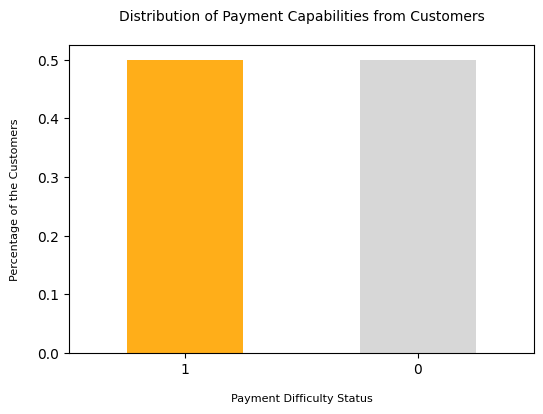

In [99]:
fig = plt.figure(figsize = (6, 4))
data_upsampled['TARGET'].value_counts(normalize = True).plot(kind = 'bar', color = ['orange','lightgrey'], alpha = 0.9, rot = 0)
plt.title('Distribution of Payment Capabilities from Customers\n', fontsize = 10)
plt.ylabel('Percentage of the Customers\n', fontsize = 8)
plt.xlabel('\nPayment Difficulty Status', fontsize = 8)
plt.show()

## Data Splitting

In [100]:
# define x from the top 20 features
x = data_upsampled[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT',
                           'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION',
                           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY',
                           'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                          'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                          'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
y = data_upsampled['TARGET']

In [101]:
# split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape)

(452297, 20) (113075, 20)


In [102]:
# normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## **Machine Learning Models**

The machine learning models that will be created are **Logistic Regression**, **Decision Tree**, and **K-Nearest Neighbors (KNN)**.

### **1. Logistic Regression**

In [103]:
# training data model
lr_model = LogisticRegression().fit(X_train, y_train)
print(lr_model)

# predictions from model training data
y_train_pred_lr = lr_model.predict(X_train)

# print classification report
print(classification_report(y_train, y_train_pred_lr))

LogisticRegression()
              precision    recall  f1-score   support

           0       0.67      0.68      0.68    226185
           1       0.68      0.66      0.67    226112

    accuracy                           0.67    452297
   macro avg       0.67      0.67      0.67    452297
weighted avg       0.67      0.67      0.67    452297



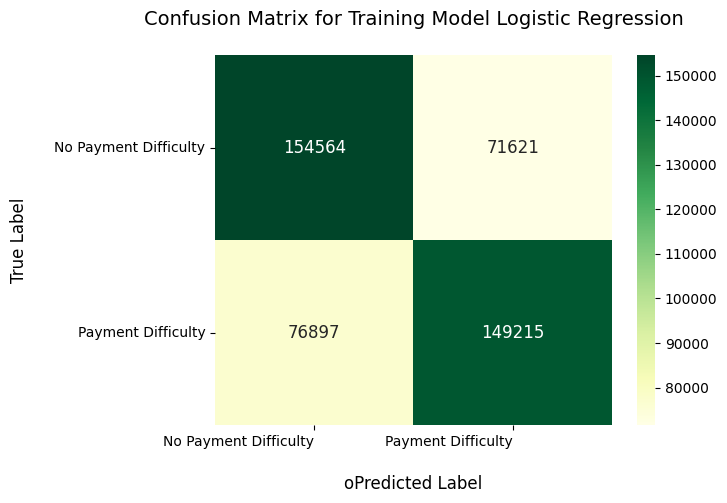

In [104]:
# confusion matrix
confusion_matrix_lr = pd.DataFrame((confusion_matrix(y_train, y_train_pred_lr)), ('No Payment Difficulty', 'Payment Difficulty'), ('No Payment Difficulty', 'Payment Difficulty'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_lr, annot = True, annot_kws = {'size': 12}, fmt = 'd', cmap = 'YlGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha ='right', fontsize = 10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha ='right', fontsize = 10)

plt.title('Confusion Matrix for Training Model Logistic Regression\n', fontsize = 14, color = 'black')
plt.ylabel('True Label\n', fontsize = 12)
plt.xlabel('\noPredicted Label', fontsize = 12)
plt.show()

In [105]:
# predictive data testing
y_test_pred_lr = lr_model.predict(X_test)

# print classification report
print(classification_report(y_test, y_test_pred_lr))

              precision    recall  f1-score   support

           0       0.67      0.68      0.68     56501
           1       0.68      0.66      0.67     56574

    accuracy                           0.67    113075
   macro avg       0.67      0.67      0.67    113075
weighted avg       0.67      0.67      0.67    113075



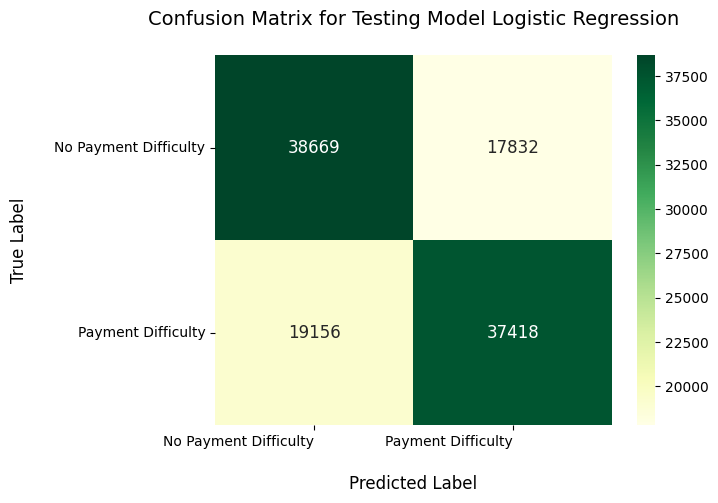

In [106]:
# confusion matrix
confusion_matrix_lr = pd.DataFrame((confusion_matrix(y_test, y_test_pred_lr)), ('No Payment Difficulty', 'Payment Difficulty'), ('No Payment Difficulty', 'Payment Difficulty'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_lr, annot = True, annot_kws = {'size': 12}, fmt = 'd', cmap = 'YlGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 10)

plt.title('Confusion Matrix for Testing Model Logistic Regression\n', fontsize = 14, color = 'black')
plt.ylabel('True Label\n', fontsize = 12)
plt.xlabel('\nPredicted Label', fontsize = 12)
plt.show()

In [109]:
acc_lr_train = round(lr_model.score(X_train,y_train)*100, 2)
acc_lr_test = round(lr_model.score(X_test,y_test)*100, 2)
roc_auc_lr = round(roc_auc_score(y_test, y_test_pred_lr), 4)

print("Accuracy Training Model: {}".format(acc_lr_train),"%")
print("Accuracy Testing Model: {}".format(acc_lr_test),"%")
print("ROC Score:", roc_auc_lr)

Accuracy Training Model: 67.16 %
Accuracy Testing Model: 67.29 %
ROC Score: 0.6729


### **2. Decision Tree**

In [110]:
# training data model
dt_model = DecisionTreeClassifier().fit(X_train, y_train)
print(dt_model)

# predictions from model training data
y_train_pred_dt = dt_model.predict(X_train)

# print classification report
print(classification_report(y_train, y_train_pred_dt))

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226185
           1       1.00      1.00      1.00    226112

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297



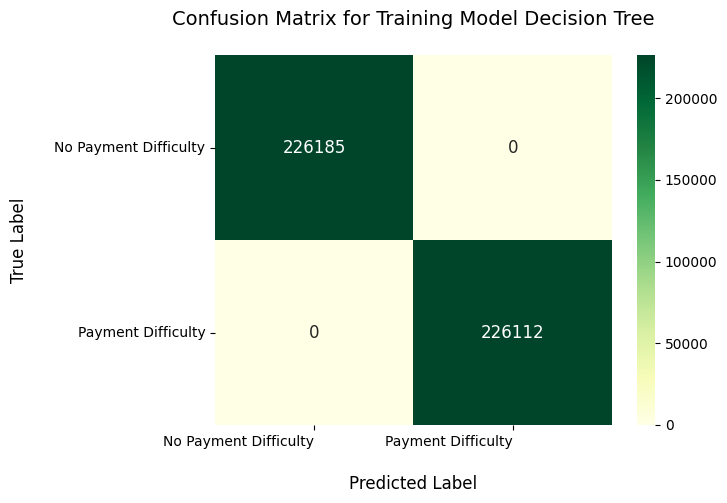

In [111]:
# confusion matrix
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('No Payment Difficulty', 'Payment Difficulty'), ('No Payment Difficulty', 'Payment Difficulty'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot = True, annot_kws = {'size': 12}, fmt = 'd', cmap = 'YlGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 10)

plt.title('Confusion Matrix for Training Model Decision Tree\n', fontsize = 14, color = 'black')
plt.ylabel('True Label\n', fontsize = 12)
plt.xlabel('\nPredicted Label', fontsize = 12)
plt.show()

In [112]:
# predictive data testing
y_test_pred_dt = dt_model.predict(X_test)

# print classification report
print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     56501
           1       0.90      0.86      0.88     56574

    accuracy                           0.88    113075
   macro avg       0.88      0.88      0.88    113075
weighted avg       0.88      0.88      0.88    113075



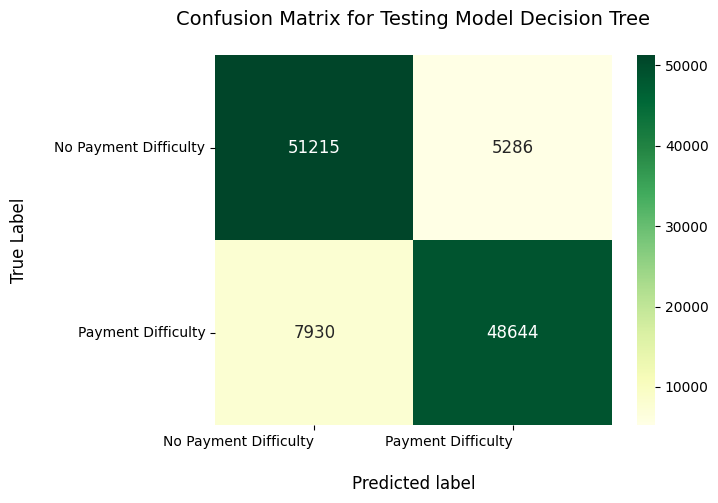

In [113]:
# confusion matrix
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_dt)), ('No Payment Difficulty', 'Payment Difficulty'), ('No Payment Difficulty', 'Payment Difficulty'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot = True, annot_kws={'size': 12}, fmt = 'd', cmap = 'YlGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 10)

plt.title('Confusion Matrix for Testing Model Decision Tree\n', fontsize = 14, color = 'black')
plt.ylabel('True Label\n', fontsize = 12)
plt.xlabel('\nPredicted label', fontsize = 12)
plt.show()

In [115]:
acc_dt_train = round(dt_model.score(X_train,y_train)*100, 2)
acc_dt_test = round(dt_model.score(X_test,y_test)*100, 2)
roc_auc_dt = round(roc_auc_score(y_test, y_test_pred_dt), 4)

print("Accuracy Training Model: {}".format(acc_dt_train),"%")
print("Accuracy Testing Model: {}".format(acc_dt_test),"%")
print("ROC Score:", roc_auc_dt)

Accuracy Training Model: 100.0 %
Accuracy Testing Model: 88.31 %
ROC Score: 0.8831


### **3. K-Nearest Neighbors (KNN)**

In [116]:
# training data model
knn_model = KNeighborsClassifier().fit(X_train,y_train)
print(knn_model)

# predictions from model training data
y_train_pred_knn = knn_model.predict(X_train)

# print classification report
print(classification_report(y_train, y_train_pred_knn))

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       1.00      0.83      0.91    226185
           1       0.86      1.00      0.92    226112

    accuracy                           0.92    452297
   macro avg       0.93      0.92      0.92    452297
weighted avg       0.93      0.92      0.92    452297



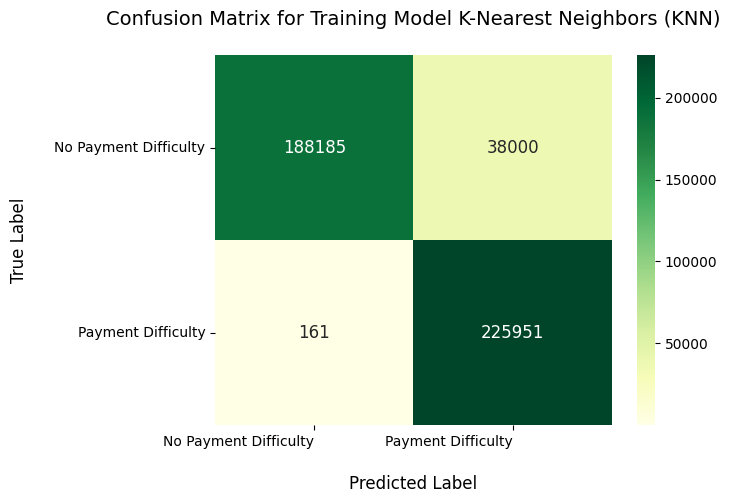

In [117]:
# confusion matrix
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_train, y_train_pred_knn)), ('No Payment Difficulty', 'Payment Difficulty'), ('No Payment Difficulty', 'Payment Difficulty'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 12}, fmt = 'd', cmap ='YlGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 10)

plt.title('Confusion Matrix for Training Model K-Nearest Neighbors (KNN)\n', fontsize = 14, color = 'black')
plt.ylabel('True Label\n', fontsize = 12)
plt.xlabel('\nPredicted Label', fontsize = 12)
plt.show()

In [118]:
# predictive data testing
y_test_pred_knn = knn_model.predict(X_test)

# print classification report
print(classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86     56501
           1       0.81      1.00      0.89     56574

    accuracy                           0.88    113075
   macro avg       0.90      0.88      0.88    113075
weighted avg       0.90      0.88      0.88    113075



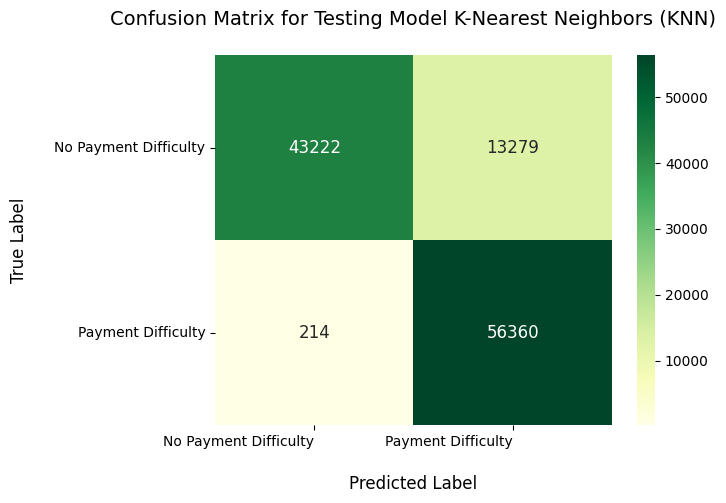

In [119]:
# confusion matrix
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_test, y_test_pred_knn)), ('No Payment Difficulty', 'Payment Difficulty'), ('No Payment Difficulty', 'Payment Difficulty'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot = True, annot_kws = {'size': 12}, fmt = 'd', cmap = 'YlGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 10)

plt.title('Confusion Matrix for Testing Model K-Nearest Neighbors (KNN)\n', fontsize = 14, color = 'black')
plt.ylabel('True Label\n', fontsize = 12)
plt.xlabel('\nPredicted Label', fontsize = 12)
plt.show()

In [120]:
acc_knn_train = round(knn_model.score(X_train,y_train)*100, 2)
acc_knn_test = round(knn_model.score(X_test,y_test)*100, 2)
roc_auc_knn = round(roc_auc_score(y_test, y_test_pred_knn), 4)

print("Accuracy Training Model: {}".format(acc_knn_train),"%")
print("Accuracy Testing Model: {}".format(acc_knn_test),"%")
print("ROC Score:", roc_auc_knn)

Accuracy Training Model: 91.56 %
Accuracy Testing Model: 88.07 %
ROC Score: 0.8806


## **Machine Learning Model Selection**

In [132]:
ml_selection = pd.DataFrame([["Logistic Regression", 0.6716, 0.6729, 0.6729],
                       ["Decision Tree", 1, 0.8831, 0.8831],
                       ["K-Nearest Neighbors (KNN)", 0.9156, 0.8807, 0.8806]],
                        columns = ["Machine Learning Models", "Training Accuracy", "Testing Accuracy", "ROC Score"])

ml_selection.sort_values(by = ['Training Accuracy', 'Testing Accuracy'], ascending = False)

,Machine Learning Models,Training Accuracy,Testing Accuracy,ROC Score
1,Decision Tree,1.0000,0.8831,0.8831
2,K-Nearest Neighbors (KNN),0.9156,0.8807,0.8806
0,Logistic Regression,0.6716,0.6729,0.6729


Based on the accuracy of the prediction results from training, testing and ROC data, the **Decision Tree model is better** than Logistic Regression and K-Nearest Neighbors (KNN).

So, the Decision Tree model will be used as a model to predict customer loan repayment capabilities.

# Prediction

## Import Data (Application Test)

In [133]:
application_test = pd.read_csv("application_test.csv", sep = ',')
application_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


The application_test data consists of **48,744 rows** and **121 column or features**.

## Data Preparation

### Checking for Duplicate Data

In [134]:
application_test.duplicated().sum()

0

### Checking for Missing Values

In [135]:
application_test.isnull().values.any()
test_mv = pd.DataFrame(application_test.isnull().sum(), columns = ['Total Missing Values'])
test_mv['Percentage'] = (test_mv['Total Missing Values']/application_test.shape[0])*100
test_mv.sort_values(by = ['Percentage'], ascending = False).reset_index()

,index,Total Missing Values,Percentage
0,COMMONAREA_AVG,33495,68.716150
1,COMMONAREA_MODE,33495,68.716150
2,COMMONAREA_MEDI,33495,68.716150
3,NONLIVINGAPARTMENTS_AVG,33347,68.412523
4,NONLIVINGAPARTMENTS_MODE,33347,68.412523
...,...,...,...
116,NAME_HOUSING_TYPE,0,0.000000
117,NAME_FAMILY_STATUS,0,0.000000
118,NAME_EDUCATION_TYPE,0,0.000000
119,NAME_INCOME_TYPE,0,0.000000


In [137]:
# remove features that have missing values of ±50%
application_test.drop(application_test.iloc[:, 43:90], inplace = True, axis = 1)
application_test.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace = True, axis = 1)

In [139]:
application_test.isnull().values.any()
tmv = pd.DataFrame(application_test.isnull().sum(), columns=['Total Missing Values'])
tmv['Percentage'] = (tmv['Total Missing Values']/application_test.shape[0])*100
tmv.sort_values(by = ['Percentage'], ascending = False).reset_index()

,index,Total Missing Values,Percentage
0,OCCUPATION_TYPE,15605,32.014197
1,EXT_SOURCE_3,8668,17.782701
2,AMT_REQ_CREDIT_BUREAU_YEAR,6049,12.409732
3,AMT_REQ_CREDIT_BUREAU_QRT,6049,12.409732
4,AMT_REQ_CREDIT_BUREAU_MON,6049,12.409732
...,...,...,...
67,REG_REGION_NOT_LIVE_REGION,0,0.000000
68,REG_REGION_NOT_WORK_REGION,0,0.000000
69,LIVE_REGION_NOT_WORK_REGION,0,0.000000
70,REG_CITY_NOT_LIVE_CITY,0,0.000000


In [140]:
# Filling missing values with median for integer and float features
# Filling missing values with mode for categorical features

integer_columns = application_test.select_dtypes(include = ['int64','float64']).columns.tolist()
category_columns = application_test.select_dtypes(include = ['object']).columns.tolist()

for column in application_test:
    if application_test[column].isnull().any():
        if(column in category_columns):
            application_test[column] = application_test[column].fillna(application_test[column].mode()[0])
        else:
            application_test[column] = application_test[column].fillna(application_test[column].median())

In [141]:
application_test.isnull().values.any()
tmv = pd.DataFrame(application_test.isnull().sum(), columns = ['Total Missing Values'])
tmv['Percentage'] = (tmv['Total Missing Values']/application_test.shape[0])*100
tmv.sort_values(by = ['Percentage'], ascending = False).reset_index()

,index,Total Missing Values,Percentage
0,SK_ID_CURR,0,0.0
1,NAME_CONTRACT_TYPE,0,0.0
2,FLAG_DOCUMENT_8,0,0.0
3,FLAG_DOCUMENT_7,0,0.0
4,FLAG_DOCUMENT_6,0,0.0
...,...,...,...
67,FLAG_CONT_MOBILE,0,0.0
68,FLAG_WORK_PHONE,0,0.0
69,FLAG_EMP_PHONE,0,0.0
70,FLAG_MOBIL,0,0.0


### Encoding Label

In [142]:
# label encoder for object features
application_test[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = application_test[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)

In [145]:
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [147]:
application_test.iloc[:,16:20] = application_test.iloc[:,16:20].abs()
application_test.iloc[:,45] = application_test.iloc[:,45].abs()

## Prediction with Machine Learning Models

Predicting customer loan repayment capabilities based on testing application data with the **Decision Tree** machine learning model

In [150]:
test_pred = application_test[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT','DAYS_BIRTH', 'AMT_INCOME_TOTAL',
                            'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 'ORGANIZATION_TYPE',
                            'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY', 'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY',
                            'NAME_EDUCATION_TYPE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
test_pred.head()

,DAYS_EMPLOYED,AMT_GOODS_PRICE,AMT_CREDIT,DAYS_BIRTH,AMT_INCOME_TOTAL,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,AMT_ANNUITY,ORGANIZATION_TYPE,NAME_INCOME_TYPE,REG_CITY_NOT_WORK_CITY,CODE_GENDER,EXT_SOURCE_2,REG_CITY_NOT_LIVE_CITY,NAME_EDUCATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,DEF_60_CNT_SOCIAL_CIRCLE,LIVE_CITY_NOT_WORK_CITY
0,2329,450000.0,568800.0,19241,135000.0,5170.0,1740.0,812,20560.5,28,6,0,0,0.789654,0,1,0.0,0.159520,0.0,0
1,4469,180000.0,222768.0,18064,99000.0,9118.0,0.0,1623,17370.0,42,6,0,1,0.291656,0,4,0.0,0.432962,0.0,0
2,4458,630000.0,663264.0,20038,202500.0,2175.0,856.0,3503,69777.0,54,6,0,1,0.699787,0,1,0.0,0.610991,0.0,0
3,1866,1575000.0,1575000.0,13976,315000.0,2000.0,1805.0,4208,49018.5,5,6,0,0,0.509677,0,4,0.0,0.612704,0.0,0
4,2191,625500.0,625500.0,13040,180000.0,4000.0,821.0,4262,32067.0,5,6,1,1,0.425687,0,4,0.0,0.519097,0.0,1


In [154]:
# make predictions
dt_test_predict = pd.Series(dt_model.predict(test_pred), name = "TARGET").astype(int)
test_results = pd.concat([application_test['SK_ID_CURR'], dt_test_predict], axis = 1)
test_results.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0


# **Business Recommendation**



*   Customers who are **civil marriage** and **single** have the highest level of **difficulty in paying loans**, so this must be anticipated by companies when providing loans.

*   Customers with **businessman** and **student** income types have **no difficulty at all in paying off their loans**, but very few take out loans. Companies can market to these customers so that more people take out loans.

*   Customers with an age range of **35-45 years** do **not experience difficulties in paying loans**, so the company can make these customers a priority in providing loans.